#  Загрузка предобученных эмбеддингов

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://rusvectores.org/
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* https://github.com/natasha/navec
* https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html

## Задачи для совместного разбора

1\. Создайте объект `nn.Embedding` на основе файла `ruscorpora_upos_skipgram_300_5_2018_sample.vec`.

In [ ]:
import torch as th

In [ ]:
embeddings = {}
index = {}
with open('ruscorpora_upos_skipgram_300_5_2018_sample.vec', 'r', encoding='utf8') as fp:
  fp.readline()
  for idx, line in enumerate(fp):
    word_pos, v = line.split(' ', maxsplit=1)
    word, pos = word_pos.split('_')
    v = [float(x) for x in v.split()]
    embeddings[(word, pos)] = v
    index[(word, pos)] = idx
embeddings

In [ ]:
embeddings_t = th.Tensor(list(embeddings.values()))

In [ ]:
word = 'человек'
pos = 'NOUN'
embeddings_t[index[(word, pos)]]

In [ ]:
import torch.nn as nn

In [ ]:
e = nn.Embedding(num_embeddings=4, embedding_dim=300)

## Задачи для самостоятельного решения

In [1]:
import torch as th
import torch.nn as nn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p class="task" id="1"></p>

1\. Воспользовавшись предобученными эмбеддингами [ruscorpora_upos_skipgram_300_5_2018](https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz), создайте словарь, где ключом является кортеж из слова и части речи, а значением - номер этого слова в файле эмбеддингами (первую строку при расчете номера строк не учитывайте). Выведите на экран количество элементов в словаре. Создайте двумерный массив эмбеддингов и выведите на экран его форму.

- [ ] Проверено на семинаре

In [3]:
embeddings = {}
index = {}
with open('drive/MyDrive/данные/ruscorpora_upos_skipgram_300_5_2018.vec', 'r', encoding='utf8') as fp:
  fp.readline()
  for idx, line in enumerate(fp):
    word_pos, v = line.split(' ', maxsplit=1)
    word, pos = word_pos.split('_')
    v = [float(x) for x in v.split()]
    embeddings[(word, pos)] = v
    index[(word, pos)] = idx

In [4]:
embeddings_t = th.Tensor(list(embeddings.values()))

In [ ]:
len(index), embeddings_t.shape

(195071, torch.Size([195071, 300]))

<p class="task" id="2"></p>

2\. Используя PCA, уменьшите размерность загруженных эмбеддингов до 2. Визуализируйте на плоскости точки для слов "кот", "кошка", "собака", "киса", "овчарка", "студент", "препод". Добавьте для точек подписи.

- [ ] Проверено на семинаре

In [ ]:
pca = PCA(n_components=2)
emb_pca = pca.fit_transform(embeddings_t)

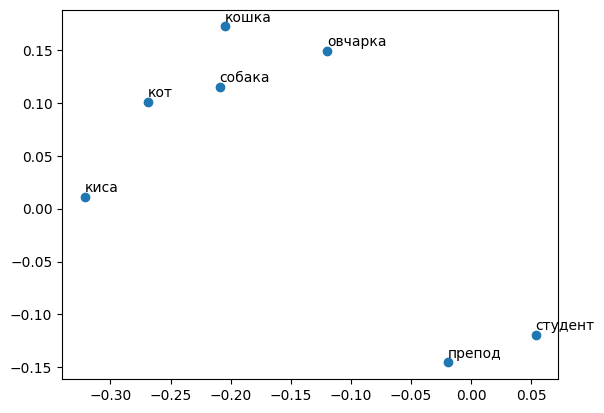

In [ ]:
words = ["кот", "кошка", "собака", "киса", "овчарка", "студент", "препод"]
indices = [index[(word, 'NOUN')] for word in words]
points = emb_pca[indices]
plt.scatter(points[:, 0], points[:, 1])
for i in range(len(words)):
  plt.annotate(words[i], (points[i, 0], points[i, 1] + 0.005))

<p class="task" id="3"></p>

3\. Напишите функцию, которая для заданного слова `word` находит `k` ближайших слов в смысле евклидова расстояния между эмбеддингами. Продемонстрируйте работу функции на словах из предыдущего задания.

- [ ] Проверено на семинаре

In [23]:
def k_nearest(word, k=3):
  for key, v in index.items():
    if key[0] == word:
      emb_word = embeddings_t[v]
      topk = th.argsort(((emb_word - embeddings_t)**2).sum(axis=1)**0.5)[1:k+1]
      res = []
      for key, v in index.items():
        if v in topk:
          res.append(key[0])
      return res

words = ["кот", "кошка", "собака", "киса", "овчарка", "студент", "препод"]
for w in words:
  print(f'{w}: {k_nearest(w, k=5)}')

кот: ['кошка', 'котенок', 'кота', 'клеточка', 'рыбалкин']
кошка: ['собака', 'кот', 'котенок', 'мяукать', 'мяукать']
собака: ['кошка', 'пес', 'собачка', 'овчарка', 'собачонка']
киса: ['кабюс', 'оборин', 'худоля', 'настюх', 'памухин']
овчарка: ['собака', 'пес', 'дог', 'дворняга', 'волкодав']
студент: ['университет', 'преподаватель', 'студентка', 'аспирант', 'заочник']
препод: ['политграмота', 'иврит', 'иняз', 'преподаватель', 'дубенко']


<p class="task" id="4"></p>

4\. Создайте слой `nn.Embedding` на основе загруженных эмбеддингов. Для каждого слова из задания 2 найдите соотетствующий ему индекс. Используя найденные индексы, получите для каждого слова его векторное представление. Выведите форму полученного тензора.

- [ ] Проверено на семинаре

In [ ]:
emb_l = nn.Embedding.from_pretrained(embeddings_t)

In [ ]:
res = emb_l(th.LongTensor(indices))
res.shape

torch.Size([7, 300])

<p class="task" id="5"></p>

5\. Создайте новый вариант `nn.Embedding`, где для нулевого индекса возвращается тензор из нулей, а для первого индекса возвращается тензор из чисел $\frac{1}{300}$. Выведите на экран размер количество эмбеддингов и эмбеддинги для индексов 0 и 1.

- [ ] Проверено на семинаре

In [6]:
emb_6 = th.vstack([
    th.zeros(size=(1, embeddings_t.shape[1])),
    th.ones(size=(1, embeddings_t.shape[1])) / 300,
    embeddings_t
])
emb_l_6 = nn.Embedding.from_pretrained(emb_6)

In [7]:
for p in emb_l_6.parameters():
  print(p.shape)

torch.Size([195073, 300])


In [ ]:
emb_l_6(th.LongTensor([0, 1]))

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

<p class="task" id="6"></p>

6\. Для каждого слова в каждом предложении батча получите его индекс. При поиске индекса слова приводите слово к нормальной форме. Части речи для простоты можно не учитывать. В случае отсутствия слова в словаре используйте индекс 1. Дополните все наборы индексов до одного размера индексом 0. Используя найденные индексы, получите для каждого слова в каждом предложении его векторное представление. Выведите форму полученного тензора.

Получите векторное представление каждого предложения путем усреднения эмбеддингов слов этого предложения. Выведите форму результата на экран.

- [ ] Проверено на семинаре

In [ ]:
!pip install pymorphy2

In [9]:
import pymorphy2
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
sents = [
    "робот пылесос только что опередил меня и сожрал попкорнину которую я хотел поднять",
    "я приходил к хирургу он мне предложил отрезать ухо"
]
morph = pymorphy2.MorphAnalyzer()

In [17]:
corpus = []
ind_buf = {x:v for k, v in index.items() for x in k}
for sent in sents:
  words = [morph.parse(w)[0].normal_form for w in word_tokenize(sent)]
  ind = [ind_buf.get(w, 1) for w in words]
  corpus.append(ind)
corpus

[[47512, 147272, 1, 1, 20369, 77780, 1, 161855, 1, 1, 77780, 125391, 159059],
 [77780, 154086, 1, 105081, 1, 77780, 192321, 57915, 78028]]

In [18]:
mx_len = max(map(lambda x: len(x), corpus))
corpus_pad = []
for vec in corpus:
  vec_buf = vec.copy()
  while len(vec_buf) < mx_len:
    vec_buf.append(0)
  corpus_pad.append(vec_buf)
corpus_pad

[[47512, 147272, 1, 1, 20369, 77780, 1, 161855, 1, 1, 77780, 125391, 159059],
 [77780, 154086, 1, 105081, 1, 77780, 192321, 57915, 78028, 0, 0, 0, 0]]

In [19]:
repr = emb_l_6(th.LongTensor(corpus_pad))
repr.shape

torch.Size([2, 13, 300])

In [20]:
repr.mean(axis=2)

tensor([[ 6.4573e-05, -3.3394e-04,  3.3333e-03,  3.3333e-03, -3.4115e-03,
         -1.1351e-03,  3.3333e-03,  4.2001e-03,  3.3333e-03,  3.3333e-03,
         -1.1351e-03, -2.3568e-03,  5.8916e-04],
        [-1.1351e-03,  1.0368e-03,  3.3333e-03, -8.0972e-03,  3.3333e-03,
         -1.1351e-03, -2.2718e-03, -4.4756e-03, -3.8101e-03,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00]])

<p class="task" id="7"></p>

7\. Загрузите модель [navec_hudlit_v1_12B_500K_300d_100q.tar](https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar) с помощью пакета `navec`. Для каждого слова в каждом предложении батча получите его индекс. При поиске индекса слова приводите слово к нормальной форме. В случае отсутствия слова в словаре используйте индекс токена `<unk>`. Дополните все наборы индексов до одного размера индексом токена `<pad>`. Используя найденные индексы, получите для каждого слова в каждом предложении его векторное представление.  Выведите форму полученного тензора.

- [ ] Проверено на семинаре

In [ ]:
!pip install navec

In [ ]:
!pip install slovnet

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

In [28]:
from navec import Navec

path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [25]:
sents = [
    "робот пылесос только что опередил меня и сожрал попкорнину которую я хотел поднять",
    "я приходил к хирургу он мне предложил отрезать ухо"
]

In [34]:
tokens = [[morph.parse(w)[0].normal_form for w in word_tokenize(sent)] for sent in sents]
indices = [[navec.vocab.get(w, navec.vocab.unk_id) for w in sent] for sent in tokens]

mx_len = max(map(lambda x: len(x), indices))
indices_pad = []
for ind in indices:
  i_buf = ind.copy()
  while len(i_buf) < mx_len:
    i_buf.append(navec.vocab.pad_id)
  indices_pad.append(i_buf)
indices_pad

[[378109,
  357295,
  436756,
  482066,
  267912,
  497765,
  146473,
  408788,
  500000,
  182773,
  497765,
  473233,
  309105],
 [497765,
  342851,
  160196,
  470904,
  267308,
  497765,
  330993,
  280341,
  459125,
  500001,
  500001,
  500001,
  500001]]

In [38]:
from slovnet.model.emb import NavecEmbedding

emb = NavecEmbedding(navec)
output = emb(th.LongTensor(indices_pad))
output.shape

torch.Size([2, 13, 300])

## Обратная связь
- [ ] Хочу получить обратную связь по решению